In [20]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import math

In [ ]:
file1 = 'data/globalterrorismdb_2021Jan-June_1222dist.xlsx'
df = pd.read_excel('data/globalterrorismdb_2021Jan-June_1222dist.xlsx')
pd.set_option('display.max_columns', None)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,202101010004,2021,1,1,NaN,0,NaT,60,Egypt,10,Middle East & North Africa,North Sinai,Beir al-Abd,31.016779,33.008587,1,0,NaN,01/01/2021: An explosive device detonated targ...,1,1,0,1,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,35.0,Military Transportation/Vehicle (excluding con...,Egyptian Armed Forces,Vehicle,60.0,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,-99,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,12.0,Remote Trigger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A remote-controlled roadside bomb was used in ...,2.0,0.0,0.0,5.0,0.0,0.0,1,4.0,Unknown,-99.0,Vehicle damaged,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Egyptian officials: Roadside bombing in Sinai...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,202101010005,2021,1,1,01/01/2021,0,NaT,92,India,6,South Asia,Jammu and Kashmir,Pampore,34.010230,74.917261,1,0,NaN,01/01/2021: Assailants threw a grenade at a Ce...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Central Reserve Police Force (CRPF),Camp,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,-99,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,7.0,Grenade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Terror module busted, seven arrested in J&K,""...","""Militants throw grenade on CRPF,"" HT Syndicat...",NaN,START Primary Collection,-9,-9,0,-9,NaN
2,202101010006,2021,1,1,NaN,0,NaT,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Hudaydah,14.782391,42.973093,1,1,NaN,01/01/2021: Assailants launched an artillery s...,1,1,1,1,5.0,State Actors,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthd...",Almansour Wedding Hall,Wedding Hall,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houthi extremists (Ansar Allah),NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0,-99,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A mortar was used in the attack.,5.0,0.0,0.0,7.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Building damaged,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,There is doubt that this incident meets terr

In [56]:
df['multiple'] = df['multiple'].astype(bool, errors='ignore')

df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,202101010004,2021,1,1,NaN,0,NaT,60,Egypt,10,Middle East & North Africa,North Sinai,Beir al-Abd,31.016779,33.008587,1,0,NaN,01/01/2021: An explosive device detonated targ...,1,1,0,1,1.0,Insurgency/Guerilla Action,False,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,35.0,Military Transportation/Vehicle (excluding con...,Egyptian Armed Forces,Vehicle,60.0,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,-99,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,12.0,Remote Trigger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A remote-controlled roadside bomb was used in ...,2.0,0.0,0.0,5.0,0.0,0.0,1,4.0,Unknown,-99.0,Vehicle damaged,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Egyptian officials: Roadside bombing in Sinai...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,202101010005,2021,1,1,01/01/2021,0,NaT,92,India,6,South Asia,Jammu and Kashmir,Pampore,34.010230,74.917261,1,0,NaN,01/01/2021: Assailants threw a grenade at a Ce...,1,1,1,0,NaN,NaN,False,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Central Reserve Police Force (CRPF),Camp,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,-99,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,7.0,Grenade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Terror module busted, seven arrested in J&K,""...","""Militants throw grenade on CRPF,"" HT Syndicat...",NaN,START Primary Collection,-9,-9,0,-9,NaN
2,202101010006,2021,1,1,NaN,0,NaT,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Hudaydah,14.782391,42.973093,1,1,NaN,01/01/2021: Assailants launched an artillery s...,1,1,1,1,5.0,State Actors,False,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthd...",Almansour Wedding Hall,Wedding Hall,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houthi extremists (Ansar Allah),NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0,-99,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A mortar was used in the attack.,5.0,0.0,0.0,7.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Building damaged,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,There is doubt that this incident meet

In [38]:
pd.crosstab(df['weaptype1'], [df['suicide']])

# data = sns.load_dataset("terrorism").pivot(index='eventid', columns=["iyear", ])

suicide,0,1
weaptype1,,
2,4,0
5,1717,1
6,2012,77
8,259,0
9,96,1
10,9,0
11,7,0
12,2,0
13,775,0


In [52]:
def tetracoric(a,b):
    tab = pd.crosstab(a,b)
    val_a = tab[0][0]
    val_b = tab[1][0]
    val_c = tab[0][1]
    val_d = tab[1][1]

    v = val_a*val_d/val_b/val_c
    return math.cos(math.pi/(1+math.sqrt(v)))
df.loc(df.columns.dtype == 'boolean')

df = df[['extended', 'vicinity', 'crit1', 'crit2', 'crit3','doubtterr', 'multiple','success', 'suicide', 'claimed','ishostkid' ]]

corr = df.corr(numeric_only=True, method=tetracoric)

C:\Users\benva\AppData\Local\Temp\ipykernel_8700\599918249.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  v = val_a*val_d/val_b/val_c
C:\Users\benva\AppData\Local\Temp\ipykernel_8700\599918249.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  v = val_a*val_d/val_b/val_c


In [47]:
corr

,extended,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,claimed,ishostkid
extended,1.000000,-0.144890,-0.067906,0.140290,0.205961,-0.175525,0.117932,0.769692,-1.000000,0.116189,0.995238
vicinity,-0.144890,1.000000,0.102872,1.000000,-0.279575,0.255082,0.001998,-0.187147,-0.395220,0.044190,-0.108503
crit1,-0.067906,0.102872,1.000000,-1.000000,-1.000000,-1.000000,0.130060,0.000825,-0.213336,0.485772,-0.283587
crit2,0.140290,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-0.012022,-0.048995,1.000000,-0.058644,0.178657
crit3,0.205961,-0.279575,-1.000000,-1.000000,1.000000,-0.999783,-0.033447,-0.056973,-0.059042,-0.249799,0.376481
doubtterr,-0.175525,0.255082,-1.000000,-1.000000,-0.999783,1.000000,-0.010275,0.068432,0.058905,0.181122,-0.285288
multiple,0.117932,0.001998,0.130060,-0.012022,-0.033447,-0.010275,1.000000,0.047643,-0.407082,0.263817,0.000056
success,0.769692,-0.187147,0.000825,-0.048995,-0.056973,0.068432,0.047643,1.000000,-0.048924,0.046030,0.892964
suicide,-1.000000,-0.395220,-0.213336,1.000000,-0.059042,0.058905,-0.407082,-0.048924,1.000000,0.484737,-1.000000
claimed,0.116189,0.044190,0.485772,-0.058644,-0.249799,0.181122,0.263817,0.046030,0.484737,1.000000,0.080163


<Axes: >

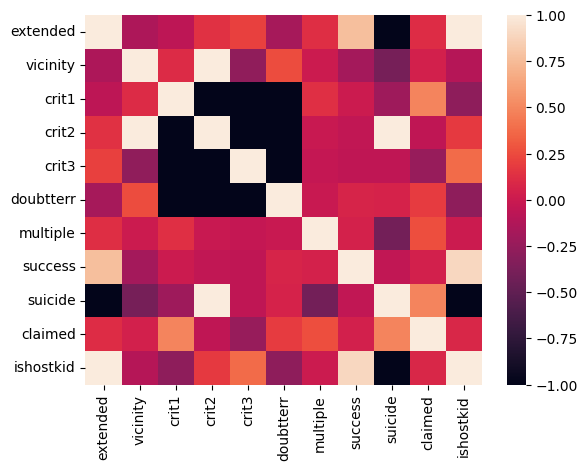

In [48]:
sns.heatmap(corr)

In [ ]:
df = df[['iyear', 'imonth','latitude', 'longitude', ]]
